In [22]:
%matplotlib inline

import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import scipy.sparse as sp
import seaborn as sns

sns.set(color_codes=True)

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
np.set_printoptions(threshold=np.nan)

In [21]:
items_mapper = pd.read_csv('/Users/baumatz/Documents/python/recsys/data/intermediate/aol_com/06/items_mapper.csv')
print(items_mapper.shape)
items_mapper

(651, 2)
The slowest run took 22.31 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 75.6 µs per loop


In [4]:
user_mapper = pd.read_csv('/Users/baumatz/Documents/python/recsys/data/intermediate/aol_com/06/user_mapper.csv')
print(user_mapper.shape)
user_mapper.head()

(181571, 2)


,ip,user_id
0,1.42.62.26,0
1,100.0.1.53,1
2,100.0.10.227,2
3,100.0.10.90,3
4,100.0.100.58,4


In [9]:
df = pd.read_csv('/Users/baumatz/Documents/python/recsys/data/intermediate/aol_com/06/2017.06.50.100.5000.transformed.csv')
print (df.shape)
df.head()

(9752073, 2)


,user_id,item_id
0,0,44
1,0,237
2,0,183
3,0,232
4,0,176


In [18]:
meta = pd.read_csv('/Users/baumatz/Documents/python/recsys/data/intermediate/aol_com/06/video_meta.csv')
print (meta.shape)
meta.head()

(651, 7)


,id,video_title,description,keywords,iab_category_one,iab_category_two,creation_date
0,594822d2c214e3685a66bc7f,Report: Senate Democrats Planning Procedural B...,Senate Democrats are reportedly planning to ta...,"geobeats,News,senate democrats obamacare,US Ne...",News,National News,2017-06-19T19:15:21.520Z
1,592ec60af3bdc946b98a97f5,Trump Back To Blasting Investigations,After wrapping up a nine-day blitz of the Midd...,"President Of The United States,Donald Trump,Cl...",News,International News,2017-05-31T13:32:47.057Z
2,58f91aa192fdde658b25da74,Anthony Bourdain Rates Food Trends,Anthony Bourdain weighs in on today's most pop...,"Jimmy Fallon,Rates,Anthony Bourdain,The Tonigh...",News,NaN,2017-04-20T20:31:26.036Z
3,594165c79efa893dabc4655d,What Do We Know About The Alleged Suspect In G...,"66-year-old James T. Hodgkinson of Belleville,...","Wednesday morning,Rep. Roger Williams,multiple...",News,International News,2017-06-14T16:35:10.221Z
4,595122939e45102b384b285e,SCOTUS To Hear Arguments On Travel Ban,The Supreme Court of the United States is lett...,"supreme court,travel ban,cbs 4 wcco minnesota,...",News,National News,2017-06-26T15:04:39.208Z


In [19]:
meta = meta.merge(items_mapper, left_on='id', right_on='vid').drop('vid',axis=1).set_index('item_id').sort_index()
print (m.shape)
meta.head('/Users/baumatz/Documents/python/recsys/data/intermediate/aol_com/06/video_meta.csv')

(651, 8)


,id,video_title,description,keywords,iab_category_one,iab_category_two,creation_date
item_id,,,,,,,
0,551c5139e4b0446aa809a879,FLASHBACK: Keri Russell on 'Felicity' Fame: 'E...,While Keri Russell plays a cutthroat Russian s...,"et,etonline,felicity,flashback,interview,jj ab...",Art And Entertainment,Movies And Tv,2015-01-28T20:02:25.095Z
1,551cf577e4b0446aa83d3a34,Ruth Bader Ginsburg Admits She Drank Before SOTU,The 81-year-old Supreme Court justice told a p...,"falls asleep,newsy,not sober,notorious rbg,Pre...",News,National News,2015-02-13T15:43:08.019Z
2,551cf85ce4b0446aa83e284a,Hot Black Market Items Are Not What You'd Expect,These hot commodities won't give you a buzz or...,"black market,black market commodities,black ma...",News,National News,2015-03-04T15:12:18.147Z
3,551d35d2e4b0446aa851e802,Justice Ginsberg Says She Wasn't Entirely Sobe...,During a talk at George Washington University ...,"time.com,Ruth Bader Ginsberg,sotu",News,National News,2015-02-13T09:20:21.527Z
4,5521e839e4b025fd8780c440,The Ultimate Whataburger Taste Test,Does Whataburger have the best fast food in Am...,"buzzfeed,fast food in america,texas burder cha...",Art And Entertainment,Pop Culture,2015-03-30T21:51:06.233Z


In [20]:
meta.to_csv('/Users/baumatz/Documents/python/recsys/data/intermediate/aol_com/06/items_data.csv')

In [39]:

s = df.groupby('ip', sort=False).size()
ids = s[(s >=50) & (s <=100)].index
print('dropped %d users from %d to %d' % (len(s) - len(ids), len(s), len(ids)))

df = df[df['ip'].isin(ids)]


dropped 8757318 users from 8939401 to 182083


In [41]:

s = df.groupby('vid', sort=False).size()
ids = s[s >=5000].index
print('dropped %d users from %d to %d' % (len(s) - len(ids), len(s), len(ids)))

df = df[df['vid'].isin(ids)]


dropped 35408 users from 36059 to 651


In [43]:
df.to_csv('/Users/baumatz/Documents/python/recsys/data/intermediate/2017.06.50.100.5000.csv', index=False)

In [4]:
t = video_data.merge(mapper, left_on='id', right_on='vid')
t.head()

,id,video_title,description,keywords,iab_category_one,iab_category_two,iab_category_three,creation_date,provider_name,genre,category_id,company_id,vid,item_id
0,58ce8d87bbbb0a42cc6d7a89,Controversial billboard in protest of Presiden...,A controversial billboard has been put up in P...,"news,phoenix,local news,abc 10 news san diego,...",News,Local News,NaN,2017-03-19T13:54:14.238Z,NaN,NaN,NaN,551438ea09eab105804dbff4,58ce8d87bbbb0a42cc6d7a89,42628
1,58ce8d87bbbb0a42cc6d7a89,Controversial billboard in protest of Presiden...,A controversial billboard has been put up in P...,"news,phoenix,local news,abc 10 news san diego,...",News,Local News,NaN,2017-03-19T13:54:14.238Z,NaN,NaN,NaN,551438ea09eab105804dbff4,58ce8d87bbbb0a42cc6d7a89,42628
2,58ce8d87bbbb0a42cc6d7a89,Controversial billboard in protest of Presiden...,A controversial billboard has been put up in P...,"news,phoenix,local news,abc 10 news san diego,...",News,Local News,NaN,2017-03-19T13:54:14.238Z,NaN,NaN,NaN,551438ea09eab105804dbff4,58ce8d87bbbb0a42cc6d7a89,42628
3,58ce8d87bbbb0a42cc6d7a89,Controversial billboard in protest of Presiden...,A controversial billboard has been put up in P...,"news,phoenix,local news,abc 10 news san diego,...",News,Local News,NaN,2017-03-19T13:54:14.238Z,NaN,NaN,NaN,551438ea09eab105804dbff4,58ce8d87bbbb0a42cc6d7a89,42628
4,58ce8d87bbbb0a42cc6d7a89,Controversial billboard in protest of Presiden...,A controversial billboard has been put up in P...,"news,phoenix,local news,abc 10 news san diego,...",News,Local News,NaN,2017-03-19T13:54:14.238Z,NaN,NaN,NaN,551438ea09eab105804dbff4,58ce8d87bbbb0a42cc6d7a89,42628


In [6]:
t.sort_values(by=['item_id'])

,id,video_title,description,keywords,iab_category_one,iab_category_two,iab_category_three,creation_date,provider_name,genre,category_id,company_id,vid,item_id
6000694,586886321c68994759e6ec99,Donald Trump: 'No Computer is Safe',President-elect Donald Trump spoke to reporter...,"NBC News,NBC,Russian hacking,Donald Trump,Trum...",News,NaN,NaN,2017-01-01T04:31:31.336Z,NaN,NaN,NaN,55d32f311146fb0bc4dc519c,586886321c68994759e6ec99,34519
6000693,586886321c68994759e6ec99,Donald Trump: 'No Computer is Safe',President-elect Donald Trump spoke to reporter...,"NBC News,NBC,Russian hacking,Donald Trump,Trum...",News,NaN,NaN,2017-01-01T04:31:31.336Z,NaN,NaN,NaN,55d32f311146fb0bc4dc519c,586886321c68994759e6ec99,34519
21017989,5868d848c4d21f19041b61c3,Trump towers over the globe; many fear the shadow,"The Republican, Democrat, now reborn Republica...","Review of the Year 2016,USA,Donald Trump,Europ...",News,International News,NaN,2017-01-01T10:21:56.746Z,NaN,NaN,NaN,55b287541146fb1bfc6c660d,5868d848c4d21f19041b61c3,34520
1113935,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523
1113956,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523
1113955,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523
1113954,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523
1113953,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523
1113952,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523
1113951,58690e7b1c68994759e7537a,'M*A*S*H' Star Passes Away,"Actor William Christopher, best known as the e...","William Christopher,70s tv show,wochit enterta...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-01-01T14:13:11.169Z,NaN,NaN,NaN,5512e1b31146fb0c602cb74d,58690e7b1c68994759e7537a,34523


In [41]:
df = pd.read_csv('/Users/baumatz/Documents/python/recsys/data/raw/2017.06.csv', usecols=['ip','vid'])
df.head()

,ip,vid
0,1.0.101.133,59492f13b90afb574eb7c302
1,1.0.101.133,5931da6185eb427b86986d34
2,1.0.101.133,59492f13b90afb574eb7c302
3,1.0.101.133,59492f13b90afb574eb7c302
4,1.0.102.81,59358d9bf3bdc946b9a3207f


In [47]:
s.head()

ip
1.0.101.133    4
1.0.102.81     1
1.0.112.226    1
1.0.114.33     2
1.0.121.85     1
dtype: int64

In [43]:
s = df.groupby('ip', sort=False).size()

In [46]:
# t = t[['ip', 'vid']]
# s = t.groupby('vid', sort=False).size()
ids = s[s >= 5000].index
print('dropped %d users from %d to %d' % (len(s) - len(ids), len(s), len(ids)))

df = df[df['vid'].isin(ids)]

KeyboardInterrupt: 

In [39]:
df = pd.read_csv('/Users/baumatz/Documents/python/recsys/data/raw/data.csv')
np.set_printoptions(threshold=np.nan)
df.vid.unique()

array(['58c216dbcebcea1722f4d5b6', '592ecf2ac214e323a7379e28',
       '592dbcb685eb427b8688fb40', '592f2fea9e45105fa1963b71',
       '592ef326c214e323a737f493', '591dbaa292fdde0991acc935',
       '592ec60af3bdc946b98a97f5', '592f349185eb427b868cdf83',
       '592f50e39e45105fa196def8', '5931da6185eb427b86986d34',
       '5937ff0ee0fa177b0c44aa05', '5942fce7e0fa1757eb249141',
       '58d2da3e25fd030232fc812c', '593cbe53c214e323a75aa3f8',
       '5941fcd29efa893dabc70940', '5942c4c8c214e36621ea739e',
       '5943a350f3bdc90c33fdcef1', '591b336cc214e318b7ccd1ed',
       '5942de55f3bdc90c33fcef22', '585fa0a77ca5763a54b65e6c',
       '5936000ff3bdc946b9a3e8c0', '5935da22f3bdc946b9a3b018',
       '5935bad79e45105fa1af8985', '5935d21c1de5a176690df0ea',
       '5935791783b51f1445383fb2', '58a3e7b085eb421409f41ddb',
       '55438911e4b08df3b6b9c9d6', '5931ba1e85eb427b86980ca3',
       '57877e34a623785f52b868af', '58a33c07f78ced1f9a223b49',
       '592f870e85eb427b868e93a0', '5938586a9efa890b926

In [20]:
reader = pd.read_csv('/Users/baumatz/Downloads/000000_0 (1)', iterator=True, chunksize=10000)
df = 

AttributeError: 'TextFileReader' object has no attribute 'head'

In [18]:
features = pd.read_csv('/Users/baumatz/Documents/workspace/playground/features.csv', index_col='id')
features.head()

,video_title,description,keywords,iab_category_one,iab_category_two,video_title_0,video_title_1,video_title_2,video_title_3,video_title_4,video_title_5,video_title_6,video_title_7,video_title_8,video_title_9,video_title_10,video_title_11,video_title_12,video_title_13,video_title_14,video_title_15,video_title_16,video_title_17,video_title_18,video_title_19,video_title_20,video_title_21,video_title_22,video_title_23,video_title_24,video_title_25,video_title_26,video_title_27,video_title_28,video_title_29,video_title_30,video_title_31,video_title_32,video_title_33,video_title_34,video_title_35,video_title_36,video_title_37,video_title_38,video_title_39,video_title_40,video_title_41,video_title_42,video_title_43,video_title_44,video_title_45,video_title_46,video_title_47,video_title_48,video_title_49,video_title_50,video_title_51,video_title_52,video_title_53,video_title_54,video_title_55,video_title_56,video_title_57,video_title_58,video_title_59,video_title_60,video_title_61,video_title_62,video_title_63,video_title_64,video_title_65,video_title_66,video_title_67,video_title_68,video_title_69,video_title_70,video_title_71,video_title_72,video_title_73,video_title_74,video_title_75,video_title_76,video_title_77,video_title_78,video_title_79,video_title_80,video_title_81,video_title_82,video_title_83,video_title_84,video_title_85,video_title_86,video_title_87,video_title_88,video_title_89,video_title_90,video_title_91,video_title_92,video_title_93,video_title_94,video_title_95,video_title_96,video_title_97,video_title_98,video_title_99,video_title_100,video_title_101,video_title_102,video_title_103,video_title_104,video_title_105,video_title_106,video_title_107,video_title_108,video_title_109,video_title_110,video_title_111,video_title_112,video_title_113,video_title_114,video_title_115,video_title_116,video_title_117,video_title_118,video_title_119,video_title_120,video_title_121,video_title_122,video_title_123,video_title_124,video_title_125,video_title_126,video_title_127,video_title_128,video_title_129,video_title_130,video_title_131,video_title_132,video_title_133,video_title_134,video_title_135,video_title_136,video_title_137,video_title_138,video_title_139,video_title_140,video_title_141,video_title_142,video_title_143,video_title_144,video_title_145,video_title_146,video_title_147,video_title_148,video_title_149,video_title_150,video_title_151,video_title_152,video_title_153,video_title_154,video_title_155,video_title_156,video_title_157,video_title_158,video_title_159,video_title_160,video_title_161,video_title_162,video_title_163,video_title_164,video_title_165,video_title_166,video_title_167,video_title_168,video_title_169,video_title_170,video_title_171,video_title_172,video_title_173,video_title_174,video_title_175,video_title_176,video_title_177,video_title_178,video_title_179,video_title_180,video_title_181,video_title_182,video_title_183,video_title_184,video_title_185,video_title_186,video_title_187,video_title_188,video_title_189,video_title_190,video_title_191,video_title_192,video_title_193,video_title_194,video_title_195,video_title_196,video_title_197,video_title_198,video_title_199,video_title_200,video_title_201,video_title_202,video_title_203,video_title_204,video_title_205,video_title_206,video_title_207,video_title_208,video_title_209,video_title_210,video_title_211,video_title_212,video_title_213,video_title_214,video_title_215,video_title_216,video_title_217,video_title_218,video_title_219,video_title_220,video_title_221,video_title_222,video_title_223,video_title_224,video_title_225,video_title_226,video_title_227,video_title_228,video_title_229,video_title_230,video_title_231,video_title_232,video_title_233,video_title_234,video_title_235,video_title_236,video_title_237,video_title_238,video_title_239,video_title_240,video_title_241,video_title_242,video_title_243,video_title_244,video_title_245,video_title_246,video_title_247,video_title_248,video_title_249,video_title_250,video_title_251,video_titl

In [14]:
features.shape

(30, 1505)

In [10]:
import spacy
nlp = spacy.load('en')

In [11]:
doc = nlp.tokenizer(features.iloc[0,0])
nlp.tagger(doc)


In [3]:
df = pd.read_csv('../data/processed/videos-metadata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 12 columns):
id                    1140 non-null object
video_title           1140 non-null object
description           1110 non-null object
keywords              1080 non-null object
iab_category_one      1107 non-null object
iab_category_two      881 non-null object
iab_category_three    370 non-null object
creation_date         1140 non-null object
provider_name         162 non-null object
genre                 161 non-null object
category_id           18 non-null float64
company_id            1140 non-null object
dtypes: float64(1), object(11)
memory usage: 107.0+ KB


In [4]:
df = df.dropna(thresh=880,axis=1)


In [ ]:
import spacy
nlp = spacy.load('en')

In [58]:
def add_vector
    

    
    





t.loc[:, 'description_'] = t.description.str.count(' ')
t.loc[:, 'description_length'] = t.description.str.count(' ')
t.head()



# s = t.description.str.count('.')
# s.sort_values(inplace=True)
# print(s.head(), s.tail()) 

,id,video_title,description,keywords,iab_category_one,iab_category_two,creation_date,company_id,description_length
0,586ec454c7480e3cef8d9a08,Health Benefits of Tea,The health benefits of tea are endless. In thi...,NaN,Food And Drink,Healthy Eating,2017-01-05 22:09:16.446000,5859598e40752f56166930b2,136
1,58d8e5f29e45103927eb48fb,Celebrity Birthday: Quentin Tarantino,"On the 27th of March, Quentin Tarantino celebr...","birthday,high school,wait,world cinema,Inglour...",Art And Entertainment,Celebrity Fan And Gossip,2017-03-27 10:14:04.242000,55143e3f09eab105804dc0a0,64
2,59056427e0fa173035084fc9,You Can Play With Pugs At This Cafe In Japan,The 'Living Room' Cafe lets you enjoy a cup of...,"Pug Cafe,Pug Cafe in Japan,Pug Cafe in Kyoto,J...",Travel,Tourist Destinations,2017-04-30 04:12:23.757000,595d46dc546f0d4c93caea66,74
3,5912f6859e451070c90e8180,New South Korea president vows to address Nort...,South Korea's new liberal President Moon Jae-i...,"North Korean,Moon Jae-in,South Korea,reuters,e...",News,International News,2017-05-10 11:16:05.366000,551438b009eab105804dbfdb,179
4,5914a4f9c214e33158e87e6d,Angry Alligator Chases a Kayaker in Mobile Bay...,A kayaker was chased by an alligator in Mobile...,"Americas,Alligator,Kayak,United States,Animal,...",News,National News,2017-05-11 17:52:56.632000,55143b751146fb0d084da4b8,694


In [47]:
adv = pd.read_csv('../data/raw/additional_video_data.csv')
adv.head()

,id,category,lifecycle,localized
0,593eff4592fdde3f18e5d2e7,"[u'Travel', u'Vacation']",[u'evergreen'],[False]
1,593b10348c08e04d1de09df2,"[u'news', u'world news', u'ATOMIC', u'NORC', u...",[u'fastbreaking'],[False]
2,5949bc7592fdde014995c50e,"[u'Entertainment', u'virals']",[u'fastbreaking'],[False]
3,58f7369ee0fa170e38359b38,"[u'entertainment', u'pop culture']",[u'fastbreaking'],[False]
4,5945bf2d8c08e02c26499310,"[u'news', u'us news']",[u'fastbreaking'],[False]


In [43]:
import ast

for element in adv.category.values.tolist():
    print ast.literal_eval(element)
# b = np.array(["[u'Travel', u'Vacation']"])
# np.apply_along_axis(ast.literal_eval, 0, b)



[u'Travel', u'Vacation']
[u'news', u'world news', u'ATOMIC', u'NORC', u'PIA', u'video', u'POL', u'US']
[u'Entertainment', u'virals']
[u'entertainment', u'pop culture']
[u'news', u'us news']
[u'entertainment', u'celebrity news', u'Entertainment/Celebrity News']
[u'News/US News']
[u'news', u'us news']
[u'Politics']
[u'Law & Crime', u'News', u'World']
[u'News/US News']
[u'News', u'Politics', u'World']
[u'news', u'us news']
[u'news', u'world news', u'News/World News']
[u'news', u'world news', u'ATOMIC', u'UK', u'EUROP', u'video', u'GB', u'CWP']
[u'news', u'world news']
[u'news', u'News', u'us news', u'Trump']
[u'News/Middle East News']
[u'news', u'us news']
[u'News/US News']
[u'news', u'world news', u'ATOMIC', u'WASH', u'PIA', u'video', u'POL', u'US']
[u'news', u'world news', u'News']
[u'News/US News']
[u'news', u'world news', u'Crime', u'News', u'Politics']
[u'News/US News']


ValueError: malformed string

In [36]:
import ast
# ast.literal_eval("[u'news', u'world news', u'ATOMIC', u'NORC', u'PIA', u'video', u'POL', u'US']")
adv.category.apply(lambda x: ast.literal_eval(x))


TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [30]:
adv.groupby('id').apply(lambda x: x['category'].str.split(','))

id                           
5514650ce4b078e86b581012  447             [[u'Celebrity News',  u'Entertainment']]
551cf577e4b0446aa83d3a34  159                             [[u'US News',  u'News']]
551cf85ce4b0446aa83e284a  298                             [[u'US News',  u'News']]
5521e839e4b025fd8780c440  438                [[u'Pop Culture',  u'Entertainment']]
5533de21e4b0280be0f85ef2  281             [[u'Celebrity News',  u'Entertainment']]
55426957e4b0f6194193510f  485                         [[u'Health News',  u'News']]
55438911e4b08df3b6b9c9d6  475                [[u'Pop Culture',  u'Entertainment']]
559974c7e4b064900c907b43  445                         [[u'Health News',  u'News']]
55999f09e4b0114fda31de88  391                     [[u'Virals',  u'Entertainment']]
55cba4cae4b04c8187cec56f  368                  [[u'Diet & Nutrition',  u'Health']]
56b53036e4b0180de1d39ac6  157                  [[u'Diet & Nutrition',  u'Health']]
56bcca0ae4b0aa4af020ef66  347                           [

In [29]:
def count_token(df, col, token):
    new_col = col + '_length'
    print (col, new_col)
    df.loc[:, new_col] = df[col].str.count(token)


In [30]:
count_token(df, 'description', ' ')
count_token(df, 'video_title', ' ')
count_token(df, 'keywords', ',')
df.head()

('description', 'description_length')
('video_title', 'video_title_length')
('keywords', 'keywords_length')


,id,video_title,description,keywords,iab_category_one,iab_category_two,iab_category_three,creation_date,provider_name,genre,category_id,company_id,description_length,video_title_length,keywords_length
0,586ec454c7480e3cef8d9a08,Health Benefits of Tea,The health benefits of tea are endless. In thi...,NaN,Food And Drink,Healthy Eating,NaN,2017-01-05 22:09:16.446000,NaN,NaN,NaN,5859598e40752f56166930b2,22.0,3,NaN
1,58d8e5f29e45103927eb48fb,Celebrity Birthday: Quentin Tarantino,"On the 27th of March, Quentin Tarantino celebr...","birthday,high school,wait,world cinema,Inglour...",Art And Entertainment,Celebrity Fan And Gossip,Celebrity News,2017-03-27 10:14:04.242000,NaN,NaN,NaN,55143e3f09eab105804dc0a0,9.0,3,32.0
2,59056427e0fa173035084fc9,You Can Play With Pugs At This Cafe In Japan,The 'Living Room' Cafe lets you enjoy a cup of...,"Pug Cafe,Pug Cafe in Japan,Pug Cafe in Kyoto,J...",Travel,Tourist Destinations,Japan,2017-04-30 04:12:23.757000,NaN,NaN,NaN,595d46dc546f0d4c93caea66,14.0,9,9.0
3,5912f6859e451070c90e8180,New South Korea president vows to address Nort...,South Korea's new liberal President Moon Jae-i...,"North Korean,Moon Jae-in,South Korea,reuters,e...",News,International News,NaN,2017-05-10 11:16:05.366000,NaN,NaN,NaN,551438b009eab105804dbfdb,25.0,8,10.0
4,5914a4f9c214e33158e87e6d,Angry Alligator Chases a Kayaker in Mobile Bay...,A kayaker was chased by an alligator in Mobile...,"Americas,Alligator,Kayak,United States,Animal,...",News,National News,U.s. News,2017-05-11 17:52:56.632000,NaN,NaN,NaN,55143b751146fb0d084da4b8,109.0,8,7.0


In [31]:
df.describe()

,category_id,description_length,video_title_length,keywords_length
count,18.000000,1110.000000,1140.000000,1080.000000
mean,297.944444,31.462162,8.035965,8.687037
std,82.878701,35.074491,3.240103,6.231123
min,41.000000,1.000000,1.000000,0.000000
25%,304.000000,16.000000,6.000000,4.000000
50%,324.000000,23.000000,8.000000,8.000000
75%,347.000000,35.000000,10.000000,12.000000
max,349.000000,775.000000,20.000000,38.000000


In [22]:
df = df[(df['video_title_length'] > 11) & (df['description_length'] < 100)]

In [17]:
train = pd.read_csv('/Users/baumatz/Downloads/ml-100k/ua.base', sep='\t', header=None, names=['user_id', 'item_id', 'rating' , 'timestamp'])
train['is_train'] = True
train.head()



,user_id,item_id,rating,timestamp,is_train
0,1,1,5,874965758,True
1,1,2,3,876893171,True
2,1,3,4,878542960,True
3,1,4,3,876893119,True
4,1,5,3,889751712,True


In [18]:
test = pd.read_csv('/Users/baumatz/Downloads/ml-100k/ua.test', sep='\t', header=None, names=['user_id', 'item_id', 'rating' , 'timestamp'])
test['is_train'] = False
test.head()

,user_id,item_id,rating,timestamp,is_train
0,1,20,4,887431883,False
1,1,33,4,878542699,False
2,1,61,4,878542420,False
3,1,117,3,874965739,False
4,1,155,2,878542201,False


In [19]:
df = pd.concat([train, test])
df.head()

,user_id,item_id,rating,timestamp,is_train
0,1,1,5,874965758,True
1,1,2,3,876893171,True
2,1,3,4,878542960,True
3,1,4,3,876893119,True
4,1,5,3,889751712,True


In [20]:
df.to_csv('/Users/baumatz/Documents/python/recsys/data/processed/movielens.csv')

loading a 10 mil subset from 2017-06

In [21]:
reader = pd.read_table('/Users/baumatz/Downloads/2017-06.gz',compression='gzip',sep='\x01', names=['ip', 'session', 'vid', 'seq', 'datetime'], 
                       header=None, iterator=True, chunksize=1000000)
df = reader.get_chunk()
df.head()

,ip,session,vid,seq,datetime
0,1.0.121.85,ef323dc3-9f4b-4359-bb31-7451769fd7c1,592f05a48c08e04d1dbff1ef,1,2017-06-09T21:39:33Z
1,1.0.128.115,73d50d91-8e3d-451a-b552-a6b319a2ad3d,5936cdf59efa890b9261a632,1,2017-06-08T01:08:50Z
2,1.0.128.143,b38cd8e4-b1f8-4dde-9207-2a4526725243,593c428db90afb2783ec0980,1,2017-06-11T13:13:41Z
3,1.0.128.143,8cae8acd-90af-4bc8-af07-b62b39790d64,568ac4f4e4b098b41155649b,1,2017-06-11T13:22:04Z
4,1.0.128.143,d04af15a-e7f0-4348-a2c2-07e77ff3fc80,574387d1e4b0afe9386d3dc5,1,2017-06-11T13:22:04Z


add views per session

In [43]:
df['views_per_session'] = df.session.value_counts()
# t = df.groupby(['ip', 'session']).apply(lambda x:len(x))1
# t.head()

# df['views_per_session']  = df.groupby(['ip', 'session'], as_index=False).apply(lambda x:len(x))
# df.head(2)

count    965944.000000
mean          1.035257
std           0.297833
min           1.000000
0%            1.000000
1%            1.000000
2%            1.000000
3%            1.000000
4%            1.000000
5%            1.000000
6%            1.000000
7.0%          1.000000
8%            1.000000
9%            1.000000
10%           1.000000
11%           1.000000
12%           1.000000
13%           1.000000
14.0%         1.000000
15%           1.000000
16%           1.000000
17%           1.000000
18%           1.000000
19%           1.000000
20%           1.000000
21%           1.000000
22%           1.000000
23%           1.000000
24%           1.000000
25%           1.000000
             ...      
71%           1.000000
72%           1.000000
73%           1.000000
74%           1.000000
75%           1.000000
76%           1.000000
77%           1.000000
78%           1.000000
79%           1.000000
80%           1.000000
81%           1.000000
82%           1.000000
83%        

In [29]:
t.sort_values(ascending=False).head()

ip              session                             
104.230.243.13  f8b2c8d9-35d0-447f-bf8d-446e12706a6e    50
100.36.152.187  90c56f6c-e3fe-4d04-aa83-c115f1011902    37
104.34.174.90   8afca131-0dd5-4184-a392-063f23333ed7    37
104.156.0.133   e90967cf-7ac8-40b5-a3e5-6c8f037ec6ec    27
100.14.76.146   91628809-cf66-4d0f-90a5-513edc54bc90    27
dtype: int64

In [35]:
# t = df.set_index(['ip', 'session'])

t.loc['104.230.243.13', 'f8b2c8d9-35d0-447f-bf8d-446e12706a6e']

/Users/baumatz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  app.launch_new_instance()


vid  \
ip             session                                                          
104.230.243.13 f8b2c8d9-35d0-447f-bf8d-446e12706a6e  57d0352ca623787e670cdc15   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5909f55e85eb425f8ead44ba   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  592559f71de5a166d39fc7f3   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585d60d0134aa139bebccf62   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58667845cd4fed49a6cec8a9   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  59257690c214e32677b97567   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  584f2310509549455ea2e02c   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5915dd63b90afb47ba7274c9   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  59136772955a3135a9c69c8e   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586ed6b5c7480e3cef8d9a10   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58f8daeb8c08e03a8c1f07c0   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58f6437683b51f199f0bbee5   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5909aa7bc214e30cc9ff8268   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58f4ed8583b51f199f06c88b   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585c2884c7480e5fa4dd8b4e   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58e54aaf1de5a16190d4f2f9   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585c29a9869ea93646f25d56   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585b21c4869ea93646f2589c   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58ebc4afe0fa1735ccedf548   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58dbf7a0f3bdc97c2e17b17d   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58c9aef9bbbb0a502137b786   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585c27db869ea93646f25d54   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58d41b974d96935c76b75050   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585b045640752f56166932df   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586e98f9c7480e3cef8d99d8   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  584879ef134aa126b82772d3   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585ae94fad5cd325edecda5f   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58487d01134aa126b82772d6   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586e97f1c7480e3cef8d99d7   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586e960cc7480e3cef8d99d6   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58487c5d134aa126b82772d5   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586d7096869ea92c996de286   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5840510576a605306cb79629   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58404d1c76a605306cb79611   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586e94cec7480e3cef8d99d4   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58404af176a605306cb795f9   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  586be453cd4fed49a6cecaa8   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  587ce118c4d21f0a537cceca   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58404a0a76a605306cb795e8   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5840478676a605306cb795d9   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  582cc852134aa12a122ab833   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  585279061c689968bbd8e2b6   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5813be01134aa17b72ebb7ad   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  584ee18cc4d21f7ade6b162d   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5813c15e134aa17b72ebb7b1   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  58527906c4d21f0efe1a9565   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5813c2ae134aa17b72ebb7b6   
               f8b2c8d9-35d0-447f-bf8d-446e12706a6e  5826f9031c6899556262bc2f   
               f8b2c8d9-

In [11]:
df.describe()

,seq,views_per_session
count,1000000.000000,965944.000000
mean,1.084114,1.035257
std,0.765590,0.297833
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,50.000000,50.000000


In [13]:
df.sort_values('views_per_session', ascending=False).head(10)

,ip,session,vid,seq,datetime,views_per_session
938683,104.48.242.196,2e526358-99d4-4707-94a2-b39c141060e3,592ef326c214e323a737f493,1,2017-06-01T00:26:47Z,50.0
547561,104.14.161.0,f3cf0813-d4f9-4e17-9dc7-860f513cecc8,58ab8a46cebcea4c6981f308,1,2017-06-08T11:25:41Z,37.0
525501,104.137.24.144,7445a7f5-6b54-488b-9895-e6a46093d7a8,5937fa0ab90afb2783e584d8,1,2017-06-10T17:01:22Z,37.0
549908,104.14.61.92,9cb8e640-9609-49ae-862e-a43ddeb22f4c,592c5d289efa89780a15b76c,1,2017-06-02T16:49:42Z,27.0
880067,104.33.160.58,ce607db1-2545-4c50-912d-15c02de8b882,592ef56b1de5a17669f41482,1,2017-06-02T12:45:10Z,27.0
575645,104.162.145.152,ef679e11-b894-4b02-855a-1a076d479476,5924add3f3bdc95b85e54973,1,2017-06-01T06:34:53Z,26.0
549147,104.14.38.74,bc6eb168-33ec-4a5e-9861-313799ba6119,592fc2abc214e323a73b8a40,1,2017-06-03T01:28:48Z,23.0
353376,100.40.91.28,84e459be-e3b7-4076-ae57-6e2703dce15c,593063a11de5a17669fbcefe,1,2017-06-01T21:42:19Z,20.0
183515,100.2.24.118,2afef95c-ca6e-45af-9ee4-b178f29891fb,5786a0c21c6899497d7ff37b,1,2017-06-11T23:31:56Z,18.0
136401,100.15.49.3,de75f7a3-f2d8-4de5-bdc4-42ff1e434271,58b89105ba82aa39a65064e9,1,2017-06-03T00:50:39Z,17.0


In [18]:
df.set_index(['ip', 'session']).loc[['104.48.242.196', '2e526358-99d4-4707-94a2-b39c141060e3'], :]

vid  \
ip             session                                                          
104.48.242.196 7b902376-e5be-4125-9d9e-0abeca3c3879  592ec60af3bdc946b98a97f5   
               2e526358-99d4-4707-94a2-b39c141060e3  592ef326c214e323a737f493   
               b912ffd1-b2f3-411f-8fa2-2b9c09aa255e  5930bbdf83b51f14452830d7   
               fa60ef77-ae4a-4ed4-bdad-f72cf14c2dca  59302e4e8c08e04d1dc5b6a4   
               20ac97dc-b666-4b91-8aa3-e28c79a67748  59303d2f9e45105fa19c5d3b   
               713391d4-bd30-4732-a158-7dc2f00223c6  593129ba85eb427b86960aad   
               88022e68-cbd1-486d-9e7d-c5415fd0d24f  5931d15285eb427b86984a63   
               6b433c8b-bd68-4af0-86a9-3c711a991a45  59316cf91de5a17669ff5908   
               287988e3-d4a2-480f-9e5d-b36281428423  5931cdeeb90afb2783d48e85   
               8c19e058-0d5a-49f7-90c0-76b670727ef4  593234be8c08e04d1dcd0039   
               b5566600-b97d-4e31-b59b-bbfb1a027168  5932e189f3bdc946b999feca   
               77014dd0-b360-4b8a-9b4f-7735c3566e38  586e8bbac4d21f6c543b5084   
               3b063736-0911-459b-8cf6-088250bec607  5933050c1de5a17669043655   
               c9f4b61f-2164-4a23-84c1-60ff161689b7  591c57d48c08e07b78e00106   
               3de3ea12-ef70-4ddf-a71c-fe19ff9587db  5934dd68b90afb2783ddabe0   
               520aaa68-5809-4207-ae1e-8d7cd99ed3d3  5936a2bac214e323a751d0b8   
               b0f5a21d-9101-427e-a47a-56814ee93c4e  5935a9f585eb427b86a465bf   
               8f8cf31f-e797-46ce-ab5f-e7784c87b701  5935791783b51f1445383fb2   
               8f8cf31f-e797-46ce-ab5f-e7784c87b701  592565191de5a166d39fe3d2   
               ba7ea49c-650e-40ca-8a4f-c04c90ce05d6  5934467e1de5a17669071cc8   
               32adb595-922e-4d2b-9e51-6dd2e8eb0dc5  5903317ce0fa1730350679ac   
               4d3d2a56-50dd-4b0d-a0f2-1d9f549388d2  5903317ce0fa1730350679ac   
               98dde719-4ce3-48f3-bb97-b42db0ea42f5  5936f925955a316f1c4b3ca9   
               381f59c1-d63f-447f-a76a-c6d33e2e9d84  5936facd83b51f14453b12a2   
               5ca07708-b600-46fd-825c-cddfa71d76a1  5935c97cf3bdc946b9a3918a   
               c234cf94-024a-4b53-8070-3acd02569a23  593808949efa890b9263b3cb   
               7ddd75b2-ff29-4e5a-9ecb-2ac001f5eff5  5937f44bb90afb2783e57b87   
               c84979ca-fc22-4418-a1f9-5193ac1161e4  593808949efa890b9263b3cb   
               761952e1-61bc-4c41-8ca4-a2c16ce91e12  592f870e85eb427b868e93a0   
               ec61484e-8a90-4302-8c3d-a16c8bfe3a77  5937900392fdde3f18d9ffcd   
               b19dfc13-de50-4ceb-b043-e2ebb54dd548  593975dd9efa890b926605a2   
               f9d7d5af-b5a9-4774-a68b-67e6734c825a  593973a9f3bdc946b9a929dd   
               8d3c0288-c6e1-4ee4-b5ec-dce1737864c5  593975dd9efa890b926605a2   
               0694d25d-6eb5-439c-9c48-a59f3e8add27  5939ac0f85eb427b86aa9716   
               fb688478-1730-4261-830a-8ff6b83a78ce  593a7c0992fdde3f18decaa7   
               7b3f0823-1b80-448a-bbbc-7b5253e2111d  593943659e45105fa1b54903   
               188269f4-0bf8-4e9d-987d-6527ec5d4aa4  5938128bf3bdc946b9a6f594   
               04c0ecee-a2d6-44e5-85d8-7b3fa4047586  593afcc9f3bdc946b9abc2f8   
               373165ab-584d-487b-8f73-107e411f6733  58c948de25fd0318c363a942   
               e39232a8-7a85-4a24-84bf-0db29a64c979  58ad241bcebcea4c698443fe   
               5bca1d7e-b284-4060-9de9-06bd75a4b89f  593b47188c08e04d1de0e698   
               63760d85-1df2-4b7e-b7e8-80630f2ebd0d  593b27e8c214e323a75964b9   
               2898c868-5949-4f74-9f37-7ba633c06af4  593b6d829efa890b926925f9   
               95f17f6c-f151-4028-ac12-0e9ccc28e937  593c3aa21de5a1766917b6d4   
               38a154c8-470c-4238-9a0a-e0903a2ceaf6  593c224af3bdc946b9acc284   
               68e25b48-7696-4c37-b4ec-ee29965cda7c  593d411e83b51f1445440b3f   
               00c3d336-e534-4216-be7d-b347e53218f1  593d9456f3bdc946b9adcf2d   
               c3b465c8-9924-4b85-81ff-4f01233dce1f  593afe1192fdde3f18dfc72b   
               370e23d9-

In [157]:
df = pd.read_csv('/Users/baumatz/Downloads/intermediate/positive-examples_memsql_test2.csv')
df.head()

,ip,vid,max_pct,vid_per_session
0,1.0.252.1,59304017e0fa177b0c2ded33,1.000000,1
1,1.0.252.1,593293819e45105fa1a4b37e,0.105170,1
2,1.0.252.1,593267a5e0fa177b0c35d261,0.079058,1
3,1.0.252.1,5932b83785eb427b869ab68d,1.000000,1
4,1.0.252.1,5932b83785eb427b869ab68d,0.108683,1


number of views last 24 hour

In [158]:
df['views_last_24h'] = df.groupby('ip',as_index=False).apply(lambda x:len(x))
df.head()

,ip,vid,max_pct,vid_per_session,views_last_24h
0,1.0.252.1,59304017e0fa177b0c2ded33,1.000000,1,7.0
1,1.0.252.1,593293819e45105fa1a4b37e,0.105170,1,3.0
2,1.0.252.1,593267a5e0fa177b0c35d261,0.079058,1,3.0
3,1.0.252.1,5932b83785eb427b869ab68d,1.000000,1,9.0
4,1.0.252.1,5932b83785eb427b869ab68d,0.108683,1,1.0


In [159]:
df.describe()

,max_pct,vid_per_session,views_last_24h
count,153609.000000,153609.000000,48828.000000
mean,0.245828,1.041000,3.145920
std,0.374979,0.929476,4.140703
min,0.000000,1.000000,1.000000
25%,0.000000,1.000000,1.000000
50%,0.010686,1.000000,2.000000
75%,0.364675,1.000000,4.000000
max,1.000000,50.000000,237.000000


we can see some outliers at max, and many cold starts but thats expected. lets create the interaction matrix [n_users, n_items] 

In [161]:
df['ones'] = 1

pivoted = df[['ip', 'vid', 'ones']].drop_duplicates(['ip', 'vid']).pivot(index='ip',columns='vid', values='ones')

sdf = pivoted.to_sparse()
sdf.head(4)

vid,55144a07e4b078e86b50050d,55144da5e4b078e86b511ee1,551466eae4b078e86b58991f,551c3315e4b0446aa801bbd1,551c5139e4b0446aa809a879,551c82a9e4b0446aa81868c8,551c8e29e4b0446aa81bc541,551cca6be4b0446aa82ec79f,551cdcd9e4b0446aa8350336,551cf577e4b0446aa83d3a34,551d06fce4b0446aa842dd65,551d35d2e4b0446aa851e802,5525eeaae4b08322397b3e33,552a563fe4b0280be0a3010f,552a9611e4b0280be0a64609,552aa3e5e4b0280be0a71eaf,552c4eafe4b0280be0b5327f,552fb02fe4b0280be0e1d6a4,5533c14ee4b0eb372ca483a1,55340698e4b0280be0fa2df4,5534c3fde4b0280be101a220,5534f2e1e4b0eb372cb7314f,553a1a98e4b0c26bac569080,553a38ede4b0c26bac595f23,553acf24e4b0c26bac5fc552,553b8594e4b04c8a696ea551,553bb2c4e4b04c8a69709fb4,553bf20de4b04c8a69738468,553cc2fde4b0700ca227cb85,553d08f7e4b04c8a697e8cb2,553e8197e4b036dbed48e7c3,553e8eade4b06d7f9fc75873,553f2c81e4b05421a0e7e45f,5541931be4b08df3b6a2701f,5541982be4b0f61941893713,5541bda9e4b0f619418ab08e,5541dfdfe4b042cdf5e56f2a,55424242e4b08df3b6aae962,5543202fe4b08df3b6b5df62,554348efe4b042cdf5f5e0fd,55435db5e4b0f619419e96a3,5543943ae4b042cdf5f83ba5,5543a006e4b0f61941a0cff7,5543fe3ce4b08df3b6bf204b,55445a96e4b042cdf6012a54,55447495e4b0f61941aa56c6,55447f35e4b0f61941aacc03,5544b163e4b08df3b6c7b7e9,5544c9d9e4b08df3b6c8c9f3,5544cb75e4b042cdf6061c22,55451c37e4b08df3b6ccb787,5545a2e6e4b0f61941b84e6a,55467f3fe4b042cdf618667b,554698fde4b0f61941c2a0e6,5546ba40e4b042cdf61b0342,5546eb58e4b0f61941c629fe,5546f719e4b0f61941c6a38d,55476247e4b042cdf620eaff,554780c9e4b0f61941cb1b23,5547afebe4b042cdf6235e0c,55486d70e4b042cdf62623a2,55488510e4b0f61941d0f252,5548f385e4b042cdf62a6579,5548f386e4b042cdf62a6583,5548f3d0e4b08df3b6f12b7c,5548f442e4b0f61941d41e27,5548f4b8e4b08df3b6f12fe3,5548f4d4e4b08df3b6f13051,5548f5bae4b042cdf62a6f60,5548f5d3e4b08df3b6f13510,5548f615e4b0f61941d42539,5548f679e4b0f61941d4264c,5548f67be4b0f61941d42660,5548f6f8e4b0f61941d4283b,5548f75fe4b0f61941d429fd,5548f7c9e4b08df3b6f13c40,5548f7fde4b042cdf62a78c5,5548f847e4b042cdf62a797f,5548f848e4b042cdf62a7989,5548f886e4b08df3b6f13fe7,5548f8b9e4b0f61941d42f5c,5548f91ee4b0f61941d430ab,5548f98ae4b08df3b6f14339,5548f9b0e4b08df3b6f1439d,5548f9e4e4b042cdf62a8060,5548fa6be4b042cdf62a81f9,5548faa9e4b08df3b6f14844,5548fad0e4b08df3b6f148fc,5548fb99e4b08df3b6f14c8f,5548fbc5e4b08df3b6f14d7f,5548fbd7e4b042cdf62a8771,5548fc53e4b0f61941d43de5,5548fd0ee4b08df3b6f15153,5548fd69e4b042cdf62a8c77,5548fddee4b042cdf62a8e52,55491660e4b042cdf62b3df9,55491a16e4b042cdf62b65eb,5549211fe4b0f61941d56c69,55492a19e4b0f61941d5aac4,55492ea7e4b08df3b6f2ecb0,55497866e4b08df3b6f528be,5549a2e8e4b042cdf62f24ed,5549a60be4b042cdf62f2ff7,554a2e9ee4b0307cc8b04c4a,554a31d5e4b0307cc8b05ebf,554b1883e4b0ee7d8cc8d304,554b1cb1e4b0e0bd7767c23d,554b3e60e4b0f6984b73dda2,554c7d1be4b0808147612ab2,554ca995e4b02a3b7a8bc57e,554ce9a2e4b080814764bb31,554cf374e4b07729e36871b6,554cf38de4b07729e36873c8,554cf39fe4b08081476570bb,554cf3a8e4b080814765716a,554cf3d2e4b07729e3687706,554cf3dde4b07729e3687814,554cf3ece4b0808147657638,554cf485e4b07729e368843a,554cf491e4b07729e368853e,554cf4ade4b07729e36889b2,554cf4b4e4b07729e3688a9d,554cf51ae4b07729e36890a1,554cf547e4b07729e368935d,554cf54ce4b07729e36893c6,554cf555e4b07729e3689470,554cf56ce4b08081476589fc,554cf577e4b0808147658b55,554cf57fe4b0808147658c8b,554cf596e4b0808147658ee8,554cf59be4b0808147658f4c,554cf5c4e4b0808147659320,554cf5c7e4b08081476593b1,554cf5dbe4b08081476595aa,554cf5e0e4b080814765963b,554cf64ee4b02a3b7a8e9f4b,554cf657e4b02a3b7a8ea0e0,554cf698e4b0808147659fb9,554cf6b2e4b02a3b7a8ea6df,554cf6e0e4b080814765a333,554cf6ebe4b080814765a428,554cf722e4b080814765a816,554cf727e4b080814765a8b6,554cf72ae4b080814765a8fc,554cf730e4b080814765a997,554cf766e4b080814765ace4,554cf773e4b080814765adca,554cf784e4b080814765af55,554cf7b9e4b02a3b7a8eb70b,554cf7c6e4b07729e368bffe,554cf7d5e4b080814765bae0,554cf814e4b080814765bf7c,554cf821e4b080814765c0ad,554cf863e4b07729e368c9b3,554cf8b4e4b02a3b7a8ecdf4,554cf8bce4b02a3b7a8ecf02,554cf8c8e4b02a3b7a8ed0b0,554cf929e4b080814765cca7,554cf968e4b080814765d03a,554cf978e4b07729e368e

lets check the sparsity in our matrix

In [163]:
sdf.density

0.0008028006992375867

the sparsity is very close to 1, lets clear the long tail

In [115]:
print(df.groupby('vid')['ones'].count().describe(percentiles=[x/10.0 for x in range(10)]))
print()

count     2596.000000
mean        59.171418
std       1295.189033
min          1.000000
0%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          2.000000
60%          2.000000
70%          4.000000
80%          6.000000
90%         13.000000
max      55266.000000
Name: ones, dtype: float64

lets set the mean as our threshold, and recreate our matrix

In [170]:
# filter
filterd = df.groupby('vid').filter(lambda x: len(x) > 60)
filterd = filterd.groupby('ip').filter(lambda x: len(x) > 3)

# # map
# users, items = {}
# for u in users
# users = dict(map(lambda x filterd.ip.unique())
# items = filterd.vid.unique()

# # pivot
# sdf = filterd[['ip', 'vid', 'ones']].drop_duplicates(['ip', 'vid']).pivot(index='ip',columns='vid', values='ones').to_sparse()
# print (pivoted.shape, sdf.density)

In [204]:
users = pd.DataFrame(filterd.ip.unique()).reset_index().set_index(0).to_dict()['index']
items = pd.DataFrame(filterd.vid.unique()).reset_index().set_index(0).to_dict()['index']

generate our training / test 

In [223]:
def build_interaction_matrix(rows, cols, data, min_rating):

    mat = sp.lil_matrix((rows, cols), dtype=np.int32)

    for uid, iid, rating in data:
        if rating >= min_rating:
            mat[uid, iid] = rating

    return mat.tocoo()

data = filterd[['ip', 'vid', 'max_pct']].drop_duplicates().apply(
    lambda row: (users.get(row[0]), items.get(row[1]), row[2]), axis=1).values
np.random.shuffle(data)
data = data.tolist()
split = len(data) / 10 * 8

train = build_interaction_matrix(len(filterd.ip.unique()), len(filterd.vid.unique()), data[:split], 0)
test = build_interaction_matrix(len(filterd.ip.unique()), len(filterd.vid.unique()), data[split:], 0)
print(len(data), split, type(train), train.shape, type(test), test.shape)

(71954, 57560, <class 'scipy.sparse.coo.coo_matrix'>, (12011, 117), <class 'scipy.sparse.coo.coo_matrix'>, (12011, 117))


In [264]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k
from lightfm.evaluation import auc_score
from lightfm.datasets import fetch_movielens

def check(train, test, no_components=10, learning_rate=0.05, alpha=0.0, k=5, epochs=10, loss='warp', max_sampled=10):

    print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))
    
    LightFM(no_components=no_components, loss=loss,
            learning_rate=learning_rate, 
            item_alpha=alpha, user_alpha=alpha, max_sampled=max_sampled, random_state=2016)
    
    model.fit(train, epochs=epochs)

    train_precision = precision_at_k(model, train, k=k).mean()
    test_precision = precision_at_k(model, test, k=k).mean()

    train_auc = auc_score(model, train).mean()
    test_auc = auc_score(model, test).mean()

    print('Precision: train %.2f, test %.2f.' % (train_precision, test_precision))
    print('AUC: train %.2f, test %.2f.' % (train_auc, test_auc))


movielens = fetch_movielens()
check(movielens['train'], movielens['test'])

The dataset has 943 users and 1682 items, with 9430 interactions in the test and 90570 interactions in the training set.
Precision: train 0.64, test 0.11.
AUC: train 0.90, test 0.86.


In [263]:
check(train, test)

The dataset has 12011 users and 117 items, with 1734 interactions in the test and 5952 interactions in the training set.
Precision: train 0.24, test 0.10.
AUC: train 0.97, test 0.88.


not great results, but the data is highly sparse and shuffled. lets play with the tool, see if we can do better.

In [254]:
from skopt import forest_minimize

In [258]:
def objective(params):
    # unpack
    epochs, learning_rate,\
    no_components, alpha = params
    
    user_alpha = alpha
    item_alpha = alpha
    model = LightFM(loss='warp',
                    random_state=2016,
                    learning_rate=learning_rate,
                    no_components=no_components,
                    user_alpha=user_alpha,
                    item_alpha=item_alpha)
    model.fit(train, epochs=epochs, verbose=True)
    
    patks = lightfm.evaluation.precision_at_k(model, test,
                                              train_interactions=None,
                                              k=5, num_threads=4)
    mapatk = np.mean(patks)
    # Make negative because we want to _minimize_ objective
    out = -mapatk
    # Handle some weird numerical shit going on
    if np.abs(out + 1) < 0.01 or out < -1.0:
        return 0.0
    else:
        return out

In [260]:
space = [(1, 60), # epochs
         (10**-6, 1.0, 'log-uniform'), # learning_rate
         (20, 200), # no_components
         (10**-6, 10**-1, 'log-uniform'), # alpha
        ]

res_fm = forest_minimize(objective, space, n_calls=250,
                     random_state=0,
                     verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.2362
Function value obtained: -0.1186
Current minimum: -0.1186
Iteration No: 2 started. Evaluating function at random point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 3

Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 0.5474
Function value obtained: -0.1201
Current minimum: -0.1201
Iteration No: 25 started. Searching for the next optimal point.
Epoch 0
Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 0.5389
Function value obtained: -0.1188
Current minimum: -0.1201
Iteration No: 26 started. Searching for the next optimal point.
Epoch 0
Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 0.5393
Function value obtained: -0.1178
Current minimum: -0.1201
Iteration No: 27 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 0.5113
Function value obtained: -0.1188
Current minimum: -0.1201
Iteration No: 28 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 0.5053
Function value obtained: -0.0

Iteration No: 59 ended. Search finished for the next optimal point.
Time taken: 0.6210
Function value obtained: -0.1188
Current minimum: -0.1205
Iteration No: 60 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Iteration No: 60 ended. Search finished for the next optimal point.
Time taken: 0.8656
Function value obtained: -0.1179
Current minimum: -0.1205
Iteration No: 61 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Iteration No: 61 ended. Search finished for the next optimal point.
Time taken: 0.5095
Function value obtained: -0.1048
Current minimum: -0.1205
Iteration No: 62 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Iteration No: 62 ended. Search finished for the next optimal point.
Time taken: 0.5873
Function value obtained: -0.0706
Current minimum: -0.1205
Iteration No: 63 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Iteration No: 63 end

Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Iteration No: 87 ended. Search finished for the next optimal point.
Time taken: 1.3299
Function value obtained: -0.1201
Current minimum: -0.1205
Iteration No: 88 started. Searching for the next optimal point.
Epoch 0
Iteration No: 88 ended. Search finished for the next optimal point.
Time taken: 0.4478
Function value obtained: -0.1187
Current minimum: -0.1205
Iteration No: 89 started. Searching for the next optimal point.
Epoch 0
Iteration No: 89 ended. Search finished for the next optimal point.
Time taken: 0.4399
Function value obtained: -0.1188
Current minimum: -0.1205
Iteration No: 90 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Iteration No: 90 ended. Search finished for the next optimal point.
Time taken: 0.51

Iteration No: 117 ended. Search finished for the next optimal point.
Time taken: 0.6126
Function value obtained: -0.1188
Current minimum: -0.1207
Iteration No: 118 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Iteration No: 118 ended. Search finished for the next optimal point.
Time taken: 0.6132
Function value obtained: -0.1186
Current minimum: -0.1207
Iteration No: 119 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Iteration No: 119 ended. Search finished for the next optimal point.
Time taken: 0.5274
Function value obtained: -0.0736
Current minimum: -0.1207
Iteration No: 120 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Iteration No: 120 ended. Search finished

Iteration No: 145 ended. Search finished for the next optimal point.
Time taken: 0.7356
Function value obtained: -0.1180
Current minimum: -0.1207
Iteration No: 146 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Iteration No: 146 ended. Search finished for the next optimal point.
Time taken: 0.7431
Function value obtained: -0.0718
Current minimum: -0.1207
Iteration No: 147 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Iteration No: 147 ended. Search finished for the next optimal point.
Time taken: 0.8167
Function value obtained: -0.1158
Current minimum: -0.1207
Iteration No: 148 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch

Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Iteration No: 161 ended. Search finished for the next optimal point.
Time taken: 0.7898
Function value obtained: -0.1188
Current minimum: -0.1207
Iteration No: 162 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Iteration No: 162 ended. Search finished for the next optimal point.
Time taken: 0.8452
Function value obtained: -0.1201
Current minimum: -0.1207
Itera

Iteration No: 175 ended. Search finished for the next optimal point.
Time taken: 0.7551
Function value obtained: -0.1186
Current minimum: -0.1207
Iteration No: 176 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Iteration No: 176 ended. Search finished for the next optimal point.
Time taken: 1.4396
Function value obtained: -0.1180
Current minimum: -0.1207
Iteration No: 177 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoc

Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Iteration No: 193 ended. Search finished for the next optimal point.
Time taken: 1.5707
Function value obtained: -0.1201
Current minimum: -0.1207
Iteration No: 194 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Iteration No: 194 ended. Search finished for the next optimal point.
Time taken: 0.7588


Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Iteration No: 209 ended. Search finished for the next optimal point.
Time taken: 2.9620
Function value obtained: -0.1201
Current minimum: -0.1207
Iteration No: 210 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Iteration No: 210 ended. Search finished for the nex

Iteration No: 221 ended. Search finished for the next optimal point.
Time taken: 2.4140
Function value obtained: -0.1201
Current minimum: -0.1207
Iteration No: 222 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Iteration No: 222 ended. Search finished for the next optimal point.
Time taken: 0.9739
Function value obtained: -0.1188
Current minimum: -0.1207
Iteration No: 223 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoc

Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Iteration No: 235 ended. Search finished for the next optimal point.
Time taken: 2.7858
Function value obtained: -0.1180
Current minimum: -0.1207
Iteration No: 236 started. Searching for the next optimal point.
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Iterati

In [261]:
print('Maximimum p@k found: {:6.5f}'.format(-res_fm.fun))
print('Optimal parameters:')
params = ['epochs', 'learning_rate', 'no_components', 'alpha']
for (p, x_) in zip(params, res_fm.x):
    print('{}: {}'.format(p, x_))

Maximimum p@k found: 0.12065
Optimal parameters:
epochs: 2
learning_rate: 0.061975471988
no_components: 169
alpha: 0.00868908522431


In [265]:
check(train, test,alpha=0.00868908522431, no_components=169, learning_rate=0.061975471988,epochs=2 )

The dataset has 12011 users and 117 items, with 1734 interactions in the test and 5952 interactions in the training set.
Precision: train 0.11, test 0.10.
AUC: train 0.69, test 0.72.


In [252]:
alpha = 1e-2
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adagrad',
                        user_alpha=alpha,
                        item_alpha=alpha, learning_rate=0.0005)
adadelta_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adadelta',
                        user_alpha=alpha,
                        item_alpha=alpha, learning_rate=0.0005)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())


adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())

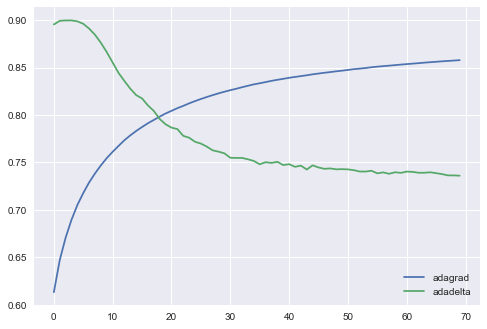

In [253]:
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()